**Business Cycles**

For Business Cycles, a key indication that we are using is the **DAX**. The DAX also known as *the Deutscher Aktien Index* or *the GER40* is a stock index that represent 40 of the largest and most liquid German companies that trade on the Frankfurt Exchange

In [107]:
#Importing libraries (include plotly)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go  

In [108]:
#Pricing dataset 
df = pd.read_excel('df.xlsx')
df.head()

,week,wPreis,Plz,full,date
0,2020-37,-37.519318,"['25', '24']",A2 - geschreddert,2020-09-14
1,2020-39,-40.000000,"['25', '24']",A2 - geschreddert,2020-09-28
2,2020-41,-34.853543,"['25', '24']",A2 - geschreddert,2020-10-12
3,2020-42,-27.560202,"['25', '24']",A2 - geschreddert,2020-10-19
4,2020-43,-31.937780,"['25', '24']",A2 - geschreddert,2020-10-26


From the datase, we will now extract the 7th Cluster, ['1', '4', '6', '7', '8', '9'] and dig in to see if that cluster has any corelation woth the DAX

In [109]:
TS7 = df[(df['Plz'] == "['1', '4', '6', '7', '8', '9']")]  
TS7.head()


,week,wPreis,Plz,full,date
2154,2020-37,3.314264,"['1', '4', '6', '7', '8', '9']",A1 & A2 - geschreddert,2020-09-14
2155,2020-38,6.106024,"['1', '4', '6', '7', '8', '9']",A1 & A2 - geschreddert,2020-09-21
2156,2020-39,8.117571,"['1', '4', '6', '7', '8', '9']",A1 & A2 - geschreddert,2020-09-28
2157,2020-40,12.717265,"['1', '4', '6', '7', '8', '9']",A1 & A2 - geschreddert,2020-10-05
2158,2020-41,13.049207,"['1', '4', '6', '7', '8', '9']",A1 & A2 - geschreddert,2020-10-12


In [110]:
fig = px.line(TS7, x='date', y='wPreis', color='full', title='Weekly Prices for [1, 4, 6, 7, 8, 9] by Category')
fig.show()

We see from the visualization that in this cluster, onlt the A1 & A2 category is present.

In [111]:
dax_df = pd.read_csv('DAX.csv')
dax_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-09-21,28.230000,28.230000,27.503,27.799999,25.416517,47700
1,2020-09-22,27.860001,28.027000,27.590,27.934000,25.539030,5300
2,2020-09-23,27.860001,27.860001,27.444,27.444000,25.091043,4000
3,2020-09-24,27.402000,27.650000,27.330,27.500000,25.142241,29000
4,2020-09-25,27.120001,27.450001,27.010,27.450001,25.096527,5300


In [112]:
dax_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       757 non-null    object 
 1   Open       757 non-null    float64
 2   High       757 non-null    float64
 3   Low        757 non-null    float64
 4   Close      757 non-null    float64
 5   Adj Close  757 non-null    float64
 6   Volume     757 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 41.5+ KB


In [113]:
dax_df["Date"] =pd.to_datetime(dax_df["Date"])
dax_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       757 non-null    datetime64[ns]
 1   Open       757 non-null    float64       
 2   High       757 non-null    float64       
 3   Low        757 non-null    float64       
 4   Close      757 non-null    float64       
 5   Adj Close  757 non-null    float64       
 6   Volume     757 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 41.5 KB


In [114]:
dax_fig = px.line(dax_df, x='Date', y='Adj Close', title='Adj Close prices for DAX')
dax_fig.show()

Visually from the plot we can see that the adj close has a ver small range within the given time frame.

Now I want to extract the year and week number as per the original time series and drop the columns i dont need

In [115]:
dax_df['Year_week'] = dax_df['Date'].dt.strftime('%G-%V')
dax_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year_week
0,2020-09-21,28.230000,28.230000,27.503,27.799999,25.416517,47700,2020-39
1,2020-09-22,27.860001,28.027000,27.590,27.934000,25.539030,5300,2020-39
2,2020-09-23,27.860001,27.860001,27.444,27.444000,25.091043,4000,2020-39
3,2020-09-24,27.402000,27.650000,27.330,27.500000,25.142241,29000,2020-39
4,2020-09-25,27.120001,27.450001,27.010,27.450001,25.096527,5300,2020-39


In [116]:
dax_df = dax_df[['Date', 'Adj Close', 'Year_week', ]]
dax_df.head()

,Date,Adj Close,Year_week,Volume
0,2020-09-21,25.416517,2020-39,47700
1,2020-09-22,25.539030,2020-39,5300
2,2020-09-23,25.091043,2020-39,4000
3,2020-09-24,25.142241,2020-39,29000
4,2020-09-25,25.096527,2020-39,5300


In [117]:
dax_price_df = pd.merge(TS7[['date', 'wPreis', 'full', 'week']], dax_df[['Date', 'Adj Close', 'Year_week']], left_on='date', right_on='Date', how='inner')
dax_price_df.head()
#dax_price_df.info()

,date,wPreis,full,week,Date,Adj Close,Year_week,Volume
0,2020-09-21,6.106024,A1 & A2 - geschreddert,2020-38,2020-09-21,25.416517,2020-39,47700
1,2020-09-28,8.117571,A1 & A2 - geschreddert,2020-39,2020-09-28,25.809652,2020-40,10800
2,2020-10-05,12.717265,A1 & A2 - geschreddert,2020-40,2020-10-05,25.955019,2020-41,2700
3,2020-10-12,13.049207,A1 & A2 - geschreddert,2020-41,2020-10-12,26.673630,2020-42,2500
4,2020-10-19,6.396958,A1 & A2 - geschreddert,2020-42,2020-10-19,25.576515,2020-43,9600


Let now visualize the weekly price and the DAX over the same time period to see if there is any visual corelation

In [128]:

trace1 = go.Scatter(x=dax_price_df['date'], y=dax_price_df['wPreis'], mode='lines', name='Weekly Prices')
trace2 = go.Scatter(x=dax_price_df['date'], y=dax_price_df['Adj Close'], mode='lines', name='Adj Close')

data = [trace1, trace2]

layout = go.Layout(
    title='Weekly Prices for [1, 4, 6, 7, 8, 9] Cluster vs the daily DAX',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Value')
)

fig = go.Figure(data=data, layout=layout)
fig.show()


**Corelation**

From this plot, we can't really see a significant corelation, only a small negative corelation at some point when you zoom in. Let'scompute the actuall corelation 

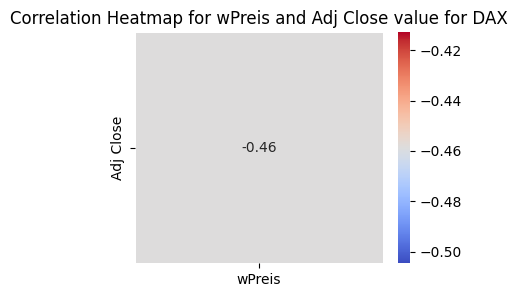

In [127]:
correlation = dax_price_df['wPreis'].corr(dax_price_df['Adj Close'])

plt.figure(figsize=(4, 3))
sns.heatmap([[correlation]], annot=True, cmap='coolwarm', linewidths=.5, xticklabels=['wPreis'], yticklabels=['Adj Close'])
plt.title('Correlation Heatmap for wPreis and Adj Close value for DAX')
plt.show()

Since there isn't any significant corelation on th *wPreis* and the *daily Close* value for the **DAX**

We will now lag the daily wPreis by 7day, a week and see if I will find any corelation between the lagged wPreis and the DAX.

In [133]:
# Lag
dax_price_df_lag = dax_price_df
dax_price_df_lag.head(10)

,date,wPreis,full,week,Date,Adj Close,Year_week,Volume,wPreis_lagged_week
0,2020-09-21,6.106024,A1 & A2 - geschreddert,2020-38,2020-09-21,25.416517,2020-39,47700,NaN
1,2020-09-28,8.117571,A1 & A2 - geschreddert,2020-39,2020-09-28,25.809652,2020-40,10800,NaN
2,2020-10-05,12.717265,A1 & A2 - geschreddert,2020-40,2020-10-05,25.955019,2020-41,2700,NaN
3,2020-10-12,13.049207,A1 & A2 - geschreddert,2020-41,2020-10-12,26.673630,2020-42,2500,NaN
4,2020-10-19,6.396958,A1 & A2 - geschreddert,2020-42,2020-10-19,25.576515,2020-43,9600,NaN
5,2020-10-26,10.488447,A1 & A2 - geschreddert,2020-43,2020-10-26,24.611967,2020-44,12900,NaN
6,2020-11-02,-4.699451,A1 & A2 - geschreddert,2020-44,2020-11-02,23.551422,2020-45,44100,NaN
7,2020-11-09,-7.365703,A1 & A2 - geschreddert,2020-45,2020-11-09,26.376495,2020-46,16000,6.106024
8,2020-11-16,-6.724194,A1 & A2 - geschreddert,2020-46,2020-11-16,26.653515,2020-47,8200,8.117571
9,2020-11-23,-4.246638,A1 & A2 - geschreddert,2020-47,2020-11-23,26.605061,2020-48,6200,12.717265


In [131]:
dax_price_df_lag['wPreis_lagged_week'] = dax_price_df_lag['wPreis'].shift(7)

In [135]:

trace1 = go.Scatter(x=dax_price_df_lag['date'], y=dax_price_df_lag['wPreis_lagged_week'], mode='lines', name='Weekly Prices lagged')
trace2 = go.Scatter(x=dax_price_df_lag['date'], y=dax_price_df_lag['Adj Close'], mode='lines', name='Adj Close')

data = [trace1, trace2]

layout = go.Layout(
    title='Weekly Prices for [1, 4, 6, 7, 8, 9] Cluster vs the daily DAX',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Value')
)

fig = go.Figure(data=data, layout=layout)
fig.show()


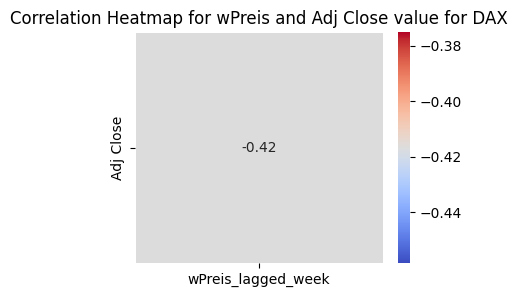

In [134]:
correlation = dax_price_df_lag['wPreis_lagged_week'].corr(dax_price_df_lag['Adj Close'])

plt.figure(figsize=(4, 3))
sns.heatmap([[correlation]], annot=True, cmap='coolwarm', linewidths=.5, xticklabels=['wPreis_lagged_week'], yticklabels=['Adj Close'])
plt.title('Correlation Heatmap for wPreis and Adj Close value for DAX')
plt.show()

At this point, we cannot deduce any corelation between Weekly prices and the DAX